In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device=(
    'cuda'
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else 'cpu'
)
print(f"Using {device} device")

Using cuda device


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 클래스 정의

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self): #초기화
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)
# flatten - linear - relu - linear - relu - linear

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:
X=torch.rand(1,28,28,device=device)
print(X.shape)
logits=model(X)
print(logits.shape)
pred_probab=nn.Softmax(dim=1)(logits) #dim=0 : 각 클래스에 대한 원시 예측값 10개 반환 # dim=1 : 각 출력의 개별 값 반환
y_pred=pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

torch.Size([1, 28, 28])
torch.Size([1, 10])
Predicted class: tensor([2], device='cuda:0')


# 모델 계층

In [15]:
input_image=torch.rand(3,28,28)
print(input_image.shape)

torch.Size([3, 28, 28])


In [18]:
# input
input_image=torch.rand(3,28,28)
print(input_image.shape)

# flatten
flatten=nn.Flatten()
flat_image=flatten(input_image)
print(flat_image.shape)

# linear
layer1=nn.Linear(in_features=28*28, out_features=20)
hidden1=layer1(flat_image)
print(hidden1.shape)

# relu
hidden1=nn.ReLU()(hidden1)

torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])


In [19]:
# Sequential
seq_modules=nn.Sequential(
    flatten,
    layer1, #linear
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image=torch.rand(3,28,28)
logits=seq_modules(input_image)

# softmax
softmax = nn.Softmax(dim=1)
pred_probab=softmax(logits)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# 딥러닝 구현

## 단층 퍼셉트론

In [2]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df=pd.read_csv(file_path)
        self.x1=df.iloc[:,0].values
        self.x2=df.iloc[:,1].values
        self.y=df.iloc[:,2].values
        self.length=len(df)

    def __getitem__(self,index):
        x=torch.FloatTensor([self.x1[index],self.x2[index]])
        y=torch.FloatTensor([self.y[index]])
        return x,y

    def __len__(self):
        return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        ###############신경망 구조###############
        self.layer=nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self,x):
        x=self.layer(x)
        return x

train_dataset=CustomDataset('/content/drive/MyDrive/tensorflow/perceptron.csv')
train_dataloader=DataLoader(train_dataset,batch_size=64,shuffle=True, drop_last=True)

# gpu로 장치전환
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model=CustomModel().to(device)
criterion=nn.BCELoss().to(device) #이진 교차 엔트로피
# 옵티마이저 설정
optimizer=optim.SGD(model.parameters(), lr=0.01)
# 모델 학습
for epoch in range(10000):
    cost=0.0
    for x,y in train_dataloader:
        x=x.to(device)
        y=y.to(device)

        output=model(x)
        loss=criterion(output,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost+=loss

    cost=cost/len(train_dataloader)

    if (epoch+1 )%1000 == 0 :
        print(f"Epoch:{epoch+1:4d}, Cost:{cost:.3f}")

#모델 평가
with torch.no_grad():
    model.eval()
    inputs=torch.FloatTensor([
        [0,0],[0,1],[1,0],[1,1]
    ]).to(device)
    outputs=model(inputs)

    print("______________")
    print(outputs)
    print(outputs<=0.5)

cuda


<ipython-input-2-272aee4d4f3d>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x=torch.FloatTensor([self.x1[index],self.x2[index]])
<ipython-input-2-272aee4d4f3d>:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y=torch.FloatTensor([self.y[index]])


Epoch:1000, Cost:0.692
Epoch:2000, Cost:0.692
Epoch:3000, Cost:0.692
Epoch:4000, Cost:0.692
Epoch:5000, Cost:0.692
Epoch:6000, Cost:0.692
Epoch:7000, Cost:0.692
Epoch:8000, Cost:0.693
Epoch:9000, Cost:0.692
Epoch:10000, Cost:0.692
______________
tensor([[0.4677],
        [0.4998],
        [0.5035],
        [0.5356]], device='cuda:0')
tensor([[ True],
        [ True],
        [False],
        [False]], device='cuda:0')


## 다층 퍼셉트론

In [7]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df=pd.read_csv(file_path)
        self.x1=df.iloc[:,0].values
        self.x2=df.iloc[:,1].values
        self.y=df.iloc[:,2].values
        self.length=len(df)

    def __getitem__(self,index):
        x=torch.FloatTensor([self.x1[index],self.x2[index]])
        y=torch.FloatTensor([self.y[index]])
        return x,y

    def __len__(self):
        return self.length

class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    ###############신경망 구조###############
    self.layer1=nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid()
    )
    self.layer2=nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    return x

train_dataset=CustomDataset('/content/drive/MyDrive/tensorflow/perceptron.csv')
train_dataloader=DataLoader(train_dataset,batch_size=64,shuffle=True, drop_last=True)

# gpu로 장치전환
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model=CustomModel().to(device)
criterion=nn.BCELoss().to(device) #이진 교차 엔트로피
# 옵티마이저 설정
optimizer=optim.SGD(model.parameters(), lr=0.01)

#모델 학습
for epoch in range(10000):
    cost=0.0
    for x,y in train_dataloader:
        x=x.to(device)
        y=y.to(device)

        output=model(x)
        loss=criterion(output,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost+=loss

    cost=cost/len(train_dataloader)

    if (epoch+1 )%1000 == 0 :
        print(f"Epoch:{epoch+1:4d}, Cost:{cost:.3f}")

#모델 평가
with torch.no_grad():
    model.eval()
    inputs=torch.FloatTensor([
        [0,0],[0,1],[1,0],[1,1]
    ]).to(device)
    outputs=model(inputs)

    print("______________")
    print(outputs)
    print(outputs<=0.5)

cuda


<ipython-input-7-df3184823bdd>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x=torch.FloatTensor([self.x1[index],self.x2[index]])
<ipython-input-7-df3184823bdd>:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y=torch.FloatTensor([self.y[index]])


Epoch:1000, Cost:0.693
Epoch:2000, Cost:0.693
Epoch:3000, Cost:0.692
Epoch:4000, Cost:0.689
Epoch:5000, Cost:0.601
Epoch:6000, Cost:0.352
Epoch:7000, Cost:0.084
Epoch:8000, Cost:0.039
Epoch:9000, Cost:0.025
Epoch:10000, Cost:0.018
______________
tensor([[0.0193],
        [0.9834],
        [0.9834],
        [0.0199]], device='cuda:0')
tensor([[ True],
        [False],
        [False],
        [ True]], device='cuda:0')


## 이미지 데이터

### 증강 => transforms

In [8]:
!pip install imgaug

In [21]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

#### 크기조정

torch.Size([3, 512, 512])


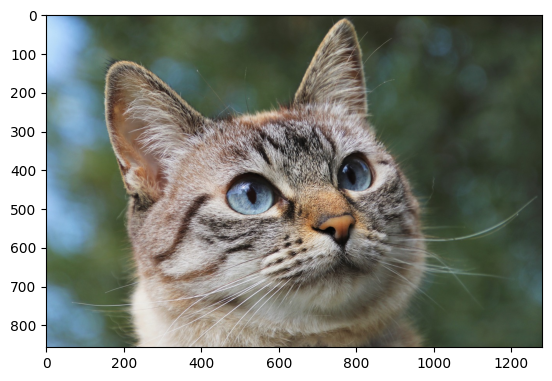

In [32]:
transform=transforms.Compose( #Compose 는 Sequential과 같은 역할을 한다.
    [
        transforms.Resize(size=(512,512)), #크기조정
        transforms.ToTensor()
    ]
)
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
print(transformed_image.shape)
plt.imshow(image)

#### 회전 및 대칭

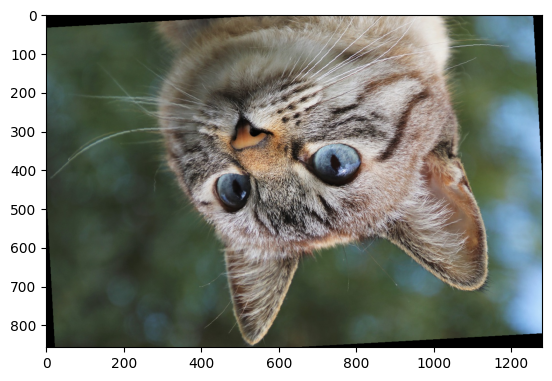

In [31]:
transform=transforms.Compose([
    transforms.RandomRotation(degrees=30,expand=False,center=None), #degrees: 각도, expand: 확장여부(True=여백 생성X), center:중심점(None=왼쪽 상단기준)
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5)
])
# -30 ~ 30 도 사이로 회전
# 수평, 수직 대칭 50%
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
plt.imshow(transformed_image)

#### 자르기 및 패딩

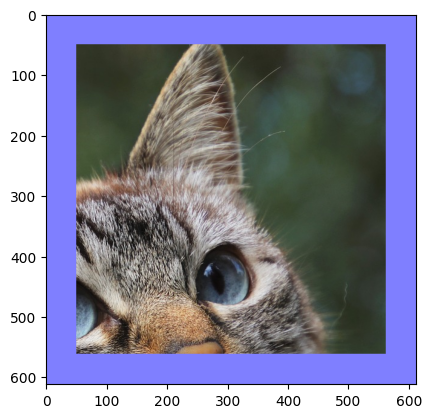

In [34]:
transform=transforms.Compose([
    transforms.RandomCrop(size=(512,512)), #자르기 : 불필요한 특징 감소
    transforms.Pad(padding=50, fill=(127,127,255), padding_mode='constant') #패딩 : 자른 이미지 크기 일정하게 수정
])
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
plt.imshow(transformed_image)

#### 변환

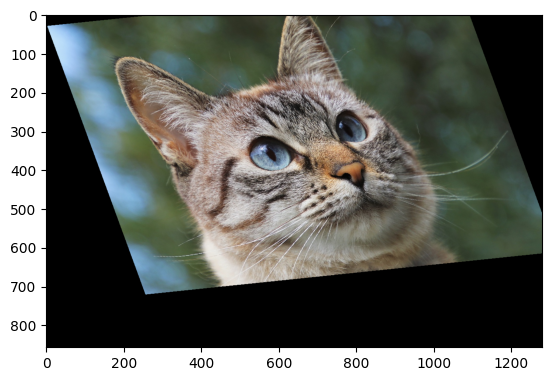

In [36]:
# 기하학적 변환
transform=transforms.Compose([
    transforms.RandomAffine(
        degrees=15, translate=(0.2,0.2),
        scale=(0.8,1.2), shear=15
    )
])
# degrees : 각도, translate : 이동, scale : 척도, shear : 전단
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
plt.imshow(transformed_image)

#### 색상 변환 및 정규화

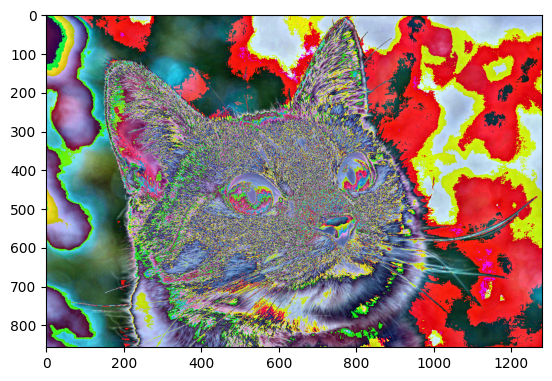

In [38]:
transform=transforms.Compose([
    transforms.ColorJitter(
        brightness=0.3, contrast=0.3,
        saturation=0.3, hue=0.3
    ),
    transforms.ToTensor(),
    transforms.Normalize( #정규화
        mean=[0.485, 0.456,0.406],
        std=[0.229, 0.224, 0.225]
    ),
    transforms.ToPILImage()
])
# saturation : 채도, brightness : 명도, contrast : 대비, hue : 색상
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
plt.imshow(transformed_image)

#### 노이즈

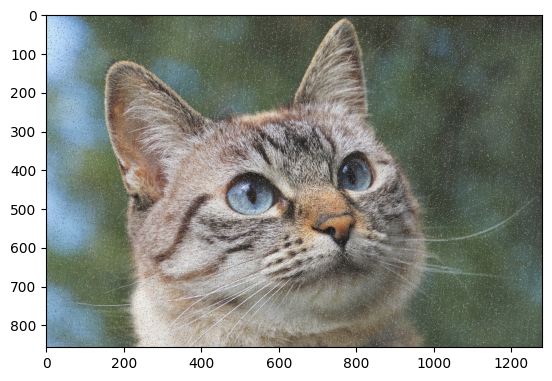

In [40]:
import numpy as np
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa

class IaaTransformers:
  def __init__(self):
    self.seq=iaa.Sequential([
        iaa.SaltAndPepper(p=(0.03,0.07)), #접잡음
        iaa.Rain(speed=(0.3,0.7))
    ])
  def __call__(self,images):
    images=np.array(images)
    augmented=self.seq.augment_image(images)
    return Image.fromarray(augmented)

transform=transforms.Compose([
    IaaTransformers()
])
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
plt.imshow(transformed_image)

#### 컷아웃 및 무작위 지우기
- 컷아웃 => 동영상에서 폐색 영역에 대해 모델을 더 강건하게 해줌
- 무작위 지우기 => 일부 영역의 누락 및 잘림이 있을 때 모델을 더 강건하게 해줌

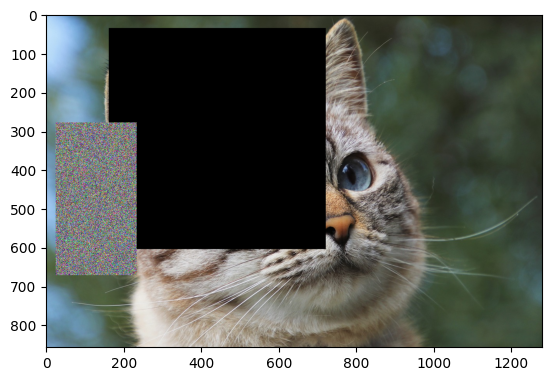

In [43]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0), #컷아웃
    transforms.RandomErasing(p=1.0,value="random"), #무작위 지우기
    transforms.ToPILImage()
])
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
plt.imshow(transformed_image)

#### 혼합 및 컷믹스
- 혼합 : 두 개 이상의 이미지를 혼합해 새로운 이미지 생성 => 낮은 오류율, 다중 레이블 문제에 더 견고히 대응가능
- 컷믹스 : 이미지 patch영역에 이미지 덮어씌우기 => 이미지 특정 영역 기억 의존 문제 완화, 이미지 전체를 보고 판단하게 하여 일반화

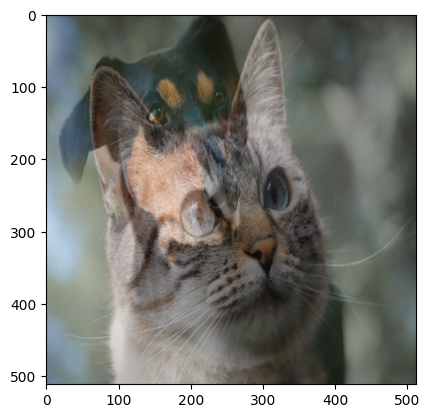

In [46]:
class Mixup:
  def __init__(self,target,scale, alpha=0.5,beta=0.5):
    self.target=target
    self.scale=scale
    self.alpha=alpha
    self.beta=beta

  def __call__(self,image):
    image=np.array(image)
    target=self.target.resize(self.scale)
    target=np.array(target)
    mix_image=image*self.alpha+target*self.beta
    return Image.fromarray(mix_image.astype(np.uint8))

transform=transforms.Compose([
    transforms.Resize((512,512)),
    Mixup(
        target=Image.open('/content/drive/MyDrive/tensorflow/images/dog.jpg'),
        scale=(512,512),
        alpha=0.5,beta=0.5
    )
])
image=Image.open('/content/drive/MyDrive/tensorflow/images/cat.jpg')
transformed_image=transform(image)
plt.imshow(transformed_image)

## vgg-16
- 2개 클래스(개/고양이) 예측으로 변환하자.

In [ ]:
import torch
from torch import nn,optim
from torch.nn import functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms,models

#하이퍼파라미터 설정
hyperparams={
    "batch_size":4,"learning_rate":0.0001,"epochs":5,
    "transform":transforms.Compose([
        transforms.Resize(256), #크기변환
        transforms.CenterCrop(224),#중앙자르기
        transforms.ToTensor(),
        transforms.Normalize( #정규화
            mean=[0.48235,0.45882,0.40784],std=[1.0/255.0,1.0/255.0,1.0/255.0]
        )
    ])
}

#데이터 로드 및 변환
train_dataset=ImageFolder("/content/drive/MyDrive/tensorflow/pet/train",transform=hyperparams['transform'])
test_dataset=ImageFolder("/content/drive/MyDrive/tensorflow/pet/test",transform=hyperparams['transform'])
train_dataloader=DataLoader(
    train_dataset,batch_size=hyperparams['batch_size'],shuffle=True, drop_last=True
)
test_dataloader=DataLoader(
    test_dataset,batch_size=hyperparams['batch_size'],shuffle=True, drop_last=True
)

#모델 불러오기
model=torchvision.models.vgg16(
    weights="VGG16_Weights.IMAGENET1K_V1"
)

#모델구조 확인
model=models.vgg16(weights="VGG16_Weights.IMAGENET1K_V1")

#미세조정 #1000개 분류 => 2개 분류 크기 축소
model.classifier[6]=nn.Linear(4096,len(train_dataset.classes))

# gpu로 전환
device = "cuda" if torch.cuda.is_available() else "cpu"
model=model.to(device)
criterion=nn.CrossEntropyLoss().to(device)

#옵티마이저 설정
optimizer=optim.SGD(model.parameters(), lr=hyperparams['learning_rate'])

#모델 학습
for epoch in range(hyperparams['epochs']):
  cost=0.0
  for images,classes in train_dataloader:
      images=images.to(device)
      classes=classes.to(device)

      output=model(images)
      loss=criterion(output,classes)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      cost+=loss

  cost=cost/len(train_dataloader)
  print(f"Epoch:{epoch+1:4d}, Cost:{cost:.3f}")

# 모델 평가 => 지표 : 정확도
with torch.no_grad():
    model.eval()

    accuracy=0.0
    for images,classes in test_dataloader:
      images=images.to(device)
      classes=classes.to(device)

      output=model(images)
      probs=F.softmax(outputs,dim=-1)
      output_classes=torch.argmax(probs,dim=-1)
      accuracy+=int(torch.eq(classes, output_classes).sum()) #옳게 예측한 개수 누적
      print(f"acc@1 : {accuracy/(len(test_dataloader)*hyperparams['batch_size'])*100:.2f}%")

#최고 성능의 가중치 저장
torch.save(model.state_dict(),"/content/drive/MyDrive/tensorflow/models/VGG16.pt")
print("Saved the model weights")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean=[0.48235,0.45882,0.40784]
std=[1.0/255.0,1.0/255.0,1.0/255.0]
images,labels=next(iter(train_dataloader))
for image,label in zip(images,labels):
  image=image.numpy().transpose((1,2,0))
  image=((std*image+mean)*255).astype(np.uint8)

  plt.imshow(image)
  plt.title(train_dataset.classes[int(label)])
  plt.show()
  break

## 내 프로젝트에 적용 --수정중--

In [74]:
!pip install icrawler

In [75]:
import os
import datetime
from multiprocessing import Pool
from icrawler.builtin import GoogleImageCrawler
import glob

In [79]:
os.mkdir('/content/drive/MyDrive/tensorflow/recycle/')
keywords=['plastic bag','paper bag','pet bottle']
for x in ['train_data','valid_data','test_data']:
  path='/content/drive/MyDrive/tensorflow/recycle/'+x
  os.mkdir(path)
  for i in keywords:
    # 폴더 안에 이미지 삽입
    path1=path+'/'+i
    os.mkdir(path1)
    google_crawler = GoogleImageCrawler(
        feeder_threads=1,
        parser_threads=1,
        downloader_threads=4,
        storage={'root_dir': path1 })
    filters = dict(
        size='large',
        license='commercial,modify',
        date=((2020, 11, 30), (2023, 10, 30)))
    google_crawler.crawl(keyword=i, filters=filters, offset=0, max_num=100,
                        min_size=(200,200), max_size=None, file_idx_offset=0)
    path2=path1+'/*'
    image=glob.glob(path2)
    for x,y in enumerate(image):
      os.rename(y,os.path.join(path1+"/",f"{i}_"+"{0:06d}".format(x+1)+"."+y[-3:]))

ERROR:parser:Exception caught when fetching page https://www.google.com/search?q=plastic+bag&ijn=0&start=0&tbs=isz%3Al%2Csur%3Afmc%2Ccdr%3A1%2Ccd_min%3A11%2F30%2F2020%2Ccd_max%3A10%2F30%2F2023&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out., remaining retry times: 2
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Plastic_Carrier_Bags.png
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Plastic_Bag_Jelly_Fish.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Nyaope_plastic_bag_after_being_used.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/For_extra_freshness%2C_keep_your_woman_sealed_in_a_plastic_bag_%282462133142%29.jpg
ERROR:parser:Exception caught when fetching page https://www.google.com/search?q=paper+bag&ijn

In [103]:
#하이퍼파라미터 설정
hyperparams={
    "batch_size":32,"learning_rate":0.0001,"epochs":50,
    "transform":transforms.Compose([
        transforms.RandomRotation(degrees=36,expand=False,center=None), #degrees: 각도, expand: 확장여부(True=여백 생성X), center:중심점(None=왼쪽 상단기준)
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.Resize(256), #크기변환
        transforms.CenterCrop(224),#중앙자르기
        transforms.ToTensor(),
        transforms.Normalize( #정규화
            mean=[0.48235,0.45882,0.40784],std=[1.0/255.0,1.0/255.0,1.0/255.0]
        )
    ])
}

#데이터 로드 및 변환
train_dataset=ImageFolder("/content/drive/MyDrive/tensorflow/recycle/train_data",transform=hyperparams['transform'])
test_dataset=ImageFolder("/content/drive/MyDrive/tensorflow/recycle/test_data",transform=hyperparams['transform'])
train_dataloader=DataLoader(
    train_dataset,batch_size=hyperparams['batch_size'],shuffle=True, drop_last=True
)
test_dataloader=DataLoader(
    test_dataset,batch_size=hyperparams['batch_size'],shuffle=True, drop_last=True
)

#모델 불러오기
model=torchvision.models.vgg16(
    weights="VGG16_Weights.IMAGENET1K_V1"
)

#모델구조 확인
model=models.vgg16(weights="VGG16_Weights.IMAGENET1K_V1")

#미세조정 #1000개 분류 => 2개 분류 크기 축소
model.classifier[6]=nn.Linear(4096,len(train_dataset.classes))

# gpu로 전환
device = "cuda" if torch.cuda.is_available() else "cpu"
model=CustomModel().to(device)
criterion=nn.CrossEntropyLoss().to(device)

#옵티마이저 설정
optimizer=optim.RMSprop(model.parameters(), lr=hyperparams['learning_rate'])

#모델 학습
for epoch in range(hyperparams['epochs']):
  cost=0.0
  for images,classes in train_dataloader:
      images=images.to(device)
      classes=classes.to(device)

      output=model(images)
      loss=criterion(output,classes)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      cost+=loss

  cost=cost/len(train_dataloader)

  if (epoch+1 )%1000 == 0 :
      print(f"Epoch:{epoch+1:4d}, Cost:{cost:.3f}")

# 모델 평가 => 지표 : 정확도
with torch.no_grad():
    model.eval()

    accuracy=0.0
    for images,classes in test_dataloader:
      images=images.to(device)
      classes=classes.to(device)

      output=model(images)
      probs=F.softmax(outputs,dim=-1)
      output_classes=torch.argmax(probs,dim=-1)
      accuracy+=int(torch.eq(classes, output_classes).sum()) #옳게 예측한 개수 누적
      print(f"acc@1 : {accuracy/(len(test_dataloader)*hyperparams['batch_size'])*100:.2f}%")

#최고 성능의 가중치 저장
torch.save(model.state_dict(),"/content/drive/MyDrive/tensorflow/models/VGG161.pt")
print("Saved the model weights")

RuntimeError: ignored

## ResNet

In [63]:
import torch
from torch import nn,optim
from torch.nn import functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms,models

In [64]:
# 기본 블록 : (3*3 합성곱 계층 - 배치 정규화 - Relu)*2
class BasicBlock(nn.Module):
    expansion=1

    def __init__(self,inplanes,planes,stride=1):
        super().__init__()
        #1
        self.conv1=nn.Conv2d( #3*3 합성곱 계층
            inplanes, planes,
            kernel_size=3, stride=stride, padding=1, bias=False
        )
        self.bn1=nn.BatchNorm2d(planes) #배치 정규화
        self.relu=nn.ReLU(inplace=True) #Relu
        #2
        self.conv2=nn.Conv2d(
            planes, planes,
            kernel_size=3, stride=1, padding=1, bias=False
        )
        self.bn2=nn.BatchNorm2d(planes)

        self.shortcut=nn.Sequential()

        if stride!=1 or inplanes!=self.expansion*planes:
            self.shortcut=nn.Sequential(
                nn.Conv2d(
                    inplanes, self.expansion*planes,
                    kernel_size=1, stride=stride, bias=False
                ),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self,x):
        out=self.conv1(x)
        out=self.bn1(out)
        out=self.relu(out)
        out=self.conv2(out)
        out=self.bn2(out)
        out+=self.shortcut(x)
        out=self.relu(out)
        return out

# 병목 블록 : 기본블록에서 확장
class BottleneckBlock(nn.Module):
    expansion=4

    def __init__(self,inplanes,planes,stride=1):
        super().__init__()
        #1
        self.conv1=nn.Conv2d(
            inplanes, planes,
            kernel_size=1, bias=False
        )
        self.bn1=nn.BatchNorm2d(planes)
        #2
        self.conv2=nn.Conv2d(
            planes, planes,
            kernel_size=3, stride=stride, padding=1, bias=False
        )
        self.bn2=nn.BatchNorm2d(planes)
        #3 ###########확장된 부분###########
        self.conv3=nn.Conv2d(
            planes, self.expansion*planes,
            kernel_size=1, bias=False
        )
        self.bn3=nn.BatchNorm2d(self.expansion*planes)
        self.relu=nn.ReLU(inplace=True)

        self.shortcut=nn.Sequential()
        if stride!=1 or inplanes!=self.expansion*planes:
            self.shortcut=nn.Sequential(
                nn.Conv2d(
                    inplanes, self.expansion*planes,
                    kernel_size=1, stride=stride, bias=False
                ),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self,x):
        out=self.conv1(x)
        out=self.bn1(out)
        out=self.relu(out)
        out=self.conv2(out)
        out=self.bn2(out)
        out=self.relu(out)
        out=self.conv3(out)
        out=self.bn3(out)
        out+=self.shortcut(x)
        out=self.relu(out)
        return out

In [69]:
class ResNet(nn.Module):
  def __init__(self,block,layers,num_classes=1000):
    super().__init__()

    self.inplanes=64
    self.stem=nn.Sequential(
        nn.Conv2d(3,self.inplanes,kernel_size=7, stride=2,padding=3,bias=False), #7*7 합성곱 계층
        nn.BatchNorm2d(self.inplanes), #배치 정규화
        nn.ReLU(inplace=True), #Relu
        nn.MaxPool2d(kernel_size=3,stride=2,padding=1) #3*3 최댓값 풀링
    )
    self.stage1=self._make_layer(block,64,layers[0],stride=1)
    self.stage2=self._make_layer(block,128,layers[1],stride=2)
    self.stage3=self._make_layer(block,256,layers[2],stride=2)
    self.stage4=self._make_layer(block,512,layers[3],stride=2)
    self.avgpool=nn.AdaptiveAvgPool2d((1,1)) #적응형 평균값 풀링
    self.fc=nn.Linear(512*block.expansion,num_classes) #선형변환

  def _make_layer(self,block, planes, num_blocks, stride):
    layers=[]
    layers.append(block(self.inplanes,planes,stride))
    self.inplanes=planes*block.expansion
    for _ in range(num_blocks-1):
      layers.append(block(self.inplanes,planes,1))
    return nn.Sequential(*layers)

  def forward(self,x):
    out=self.stem(x)
    out=self.stage1(out)
    out=self.stage2(out)
    out=self.stage3(out)
    out=self.stage4(out)
    out=self.avgpool(out) #평균값 출링
    out=torch.flatten(out,1) #flatten
    out=self.fc(out) #완전 연결계층 연결
    return out


In [71]:
from torchvision import models
from torchinfo import summary

resnet34=ResNet(BasicBlock,  [3,4,6,3],1000)
torch_model=models.resnet34(weights="ResNet34_Weights.IMAGENET1K_V1") #사전학습된 resnet34

resnet34_info=summary(resnet34,(1,3,224,224),verbose=0)
torch_model_info=summary(torch_model,(1,3,224,224),verbose=0)
print(resnet34_info.total_params)
print(torch_model_info.total_params)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]


21797672
21797672


# LeNet

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # 입력 이미지 채널, 6개의 output 채널, 5x5 정방 합성곱 커널을 사용합니다.
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # 아핀 변환: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5x5 이미지 차원
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))# 최대 풀링은 (2, 2) 윈도우 크기를 사용합니다.
    x = F.max_pool2d(F.relu(self.conv2(x)), 2) # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수 있습니다.
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

def num_flat_features(self, x):
    size = x.size()[1:]  # 크기는 배치 차원을 제외한 모든 차원을 가져옵니다.
    num_features = 1
    for s in size:
        num_features *= s
    return num_features